In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import anndata as ad

In [5]:
binary_matrix = pd.read_csv('../MOFA/MOFA_15_Factors_6082HVG/binary_matrix_factors.csv', index_col='Unnamed: 0')
adata = sc.read_h5ad('../MOFA/adata_combined_even_more_hvg.h5ad')

In [10]:
genes_mofa_factors = binary_matrix.T.columns.tolist()

In [ ]:
pd.DataFrame(genes_mofa_factors).to_csv('MOFA_genes.csv')

In [32]:
len(genes_mofa_factors)

2135

# DE genes across Technologies

In [11]:
sc.tl.rank_genes_groups(adata, groupby='Condition', layer='log_norm')

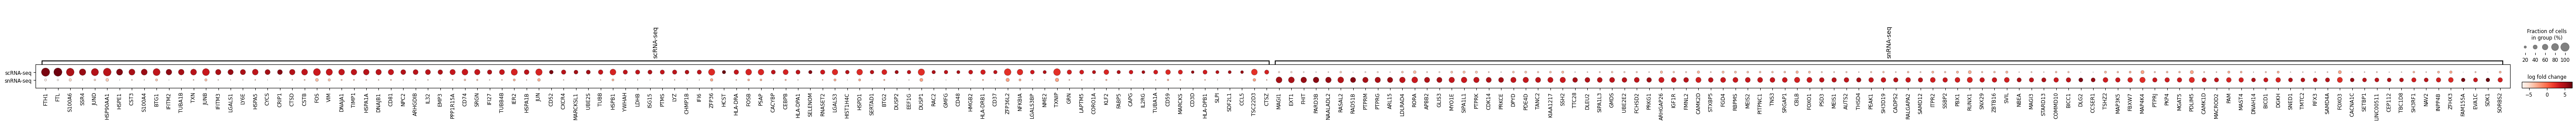

In [38]:
sc.pl.rank_genes_groups_dotplot(adata, groupby='Condition', values_to_plot='logfoldchanges', n_genes=100)

In [20]:
df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

In [28]:
df_sc = sc.get.rank_genes_groups_df(adata, group='scRNA-seq')
df_sn = sc.get.rank_genes_groups_df(adata, group='snRNA-seq')

In [31]:
de_sc = df_sc[df_sc.logfoldchanges>5].names.tolist()
de_sn = df_sn[df_sn.logfoldchanges>5].names.tolist()

In [40]:
sc_remove = ([i for i in de_sc if i in genes_mofa_factors])
sn_remove = ([i for i in de_sn if i in genes_mofa_factors])

In [47]:
genes_to_remove_techincal_variability= sn_remove + sc_remove

In [48]:
len(genes_to_remove_techincal_variability)

85

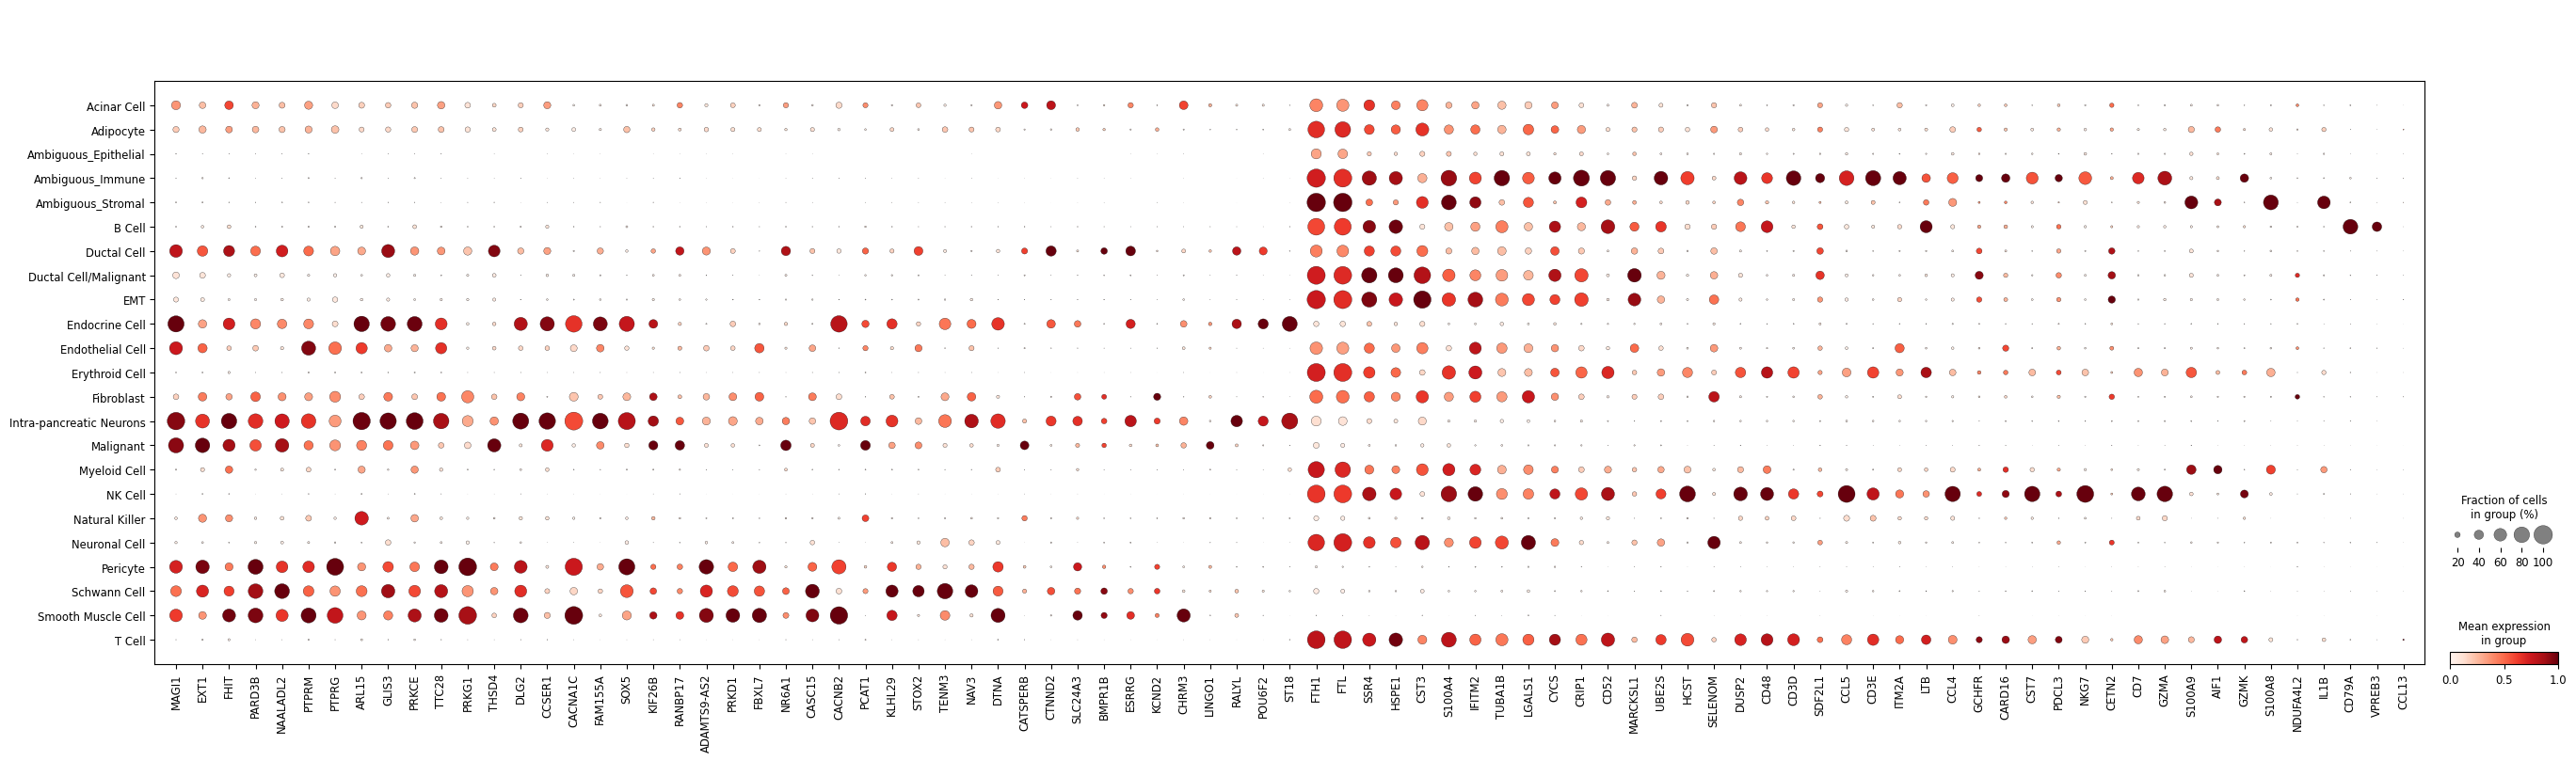

In [57]:
sc.pl.dotplot(adata, groupby='Level_1', var_names=genes_to_remove_techincal_variability,standard_scale='var', layer='log_norm' )

# Markers from Broad

In [305]:
broad_markers = pd.read_csv('broad_markers.csv', index_col='Unnamed: 0')

In [306]:
broad_markers

,Gene 1,Gene 2,Gene 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
Adipocyte,PLIN1,LPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pancreatic stellate cells,DES,DCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancer associated fibroblasts,COL6A3,COL1A1,THBS2,FN1,PDPN,DCN,VIM,FAP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iCAF,IL1R1,IL6,LIF,CXCL1,CCL2,HAS1,MAFF,CXCL12,IGFBP6,CLU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
myCAF,ACTA2,MYL9,TPM1,TAGLN,LRCC15,MMP11,CALD1,IGFBP7,TPM2,INHBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Endothelial,PECAM1,VWF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lymphatic,FLT4,SEMA3A,SEMA3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vascular,ESAM,FLT1,EPAS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Intra-pancreatic neurons,ENO2,CHAT,TH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pericyte/Vascular Smooth Muscle,PDGFRB,DLK1,RGS5,CSPG4,MCAM,CARMn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
broad_markers_list = list(set(broad_markers.values.flatten().astype(str)[broad_markers.values.flatten().astype(str) != 'nan']))

In [338]:
pd.DataFrame(broad_markers_list).to_csv('broad_markers_list.csv')

,0
0,LPL
1,IGFBP6
2,GPR87
3,CD4
4,AGR3
...,...
180,TAGLN
181,IRF7
182,LGALS4
183,ANXA4


In [336]:
([i for i in broad_markers_list if i not in adata.var_names])

['GPR87',
 'KRT6C',
 'CHAT',
 'TH',
 'CYP3A7',
 'PLIN1',
 'CARMn',
 'ANXA8L2',
 'CTSL2',
 'ST6GALNAC1',
 'LGALS2',
 'CTSA',
 'EPCAM',
 'MYO1A',
 'FOXP2',
 'BST1',
 'LRCC15',
 'ATAD4',
 'LOC400573']

# DE Markers across Cell Types

In [343]:
sc.tl.rank_genes_groups(adata, groupby='Level_1', layer='log_norm')

In [ ]:
df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(30)
print(len(list(set(df.values.flatten()))))

In [ ]:
# Filter out genes that are already present in genes_mofa_factors 
genes_to_check = ([i for i in (list(set(df.values.flatten()))) if i not in genes_mofa_factors])
print(len(genes_to_check))

517
81


In [454]:
df.head()

,Acinar Cell,Adipocyte,Ambiguous_Epithelial,Ambiguous_Immune,Ambiguous_Stromal,B Cell,Ductal Cell,Ductal Cell/Malignant,EMT,Endocrine Cell,Endothelial Cell,Erythroid Cell,Fibroblast,Intra-pancreatic Neurons,Malignant,Myeloid Cell,NK Cell,Natural Killer,Neuronal Cell,Pericyte,Schwann Cell,Smooth Muscle Cell,T Cell
0,PRSS1,APOA1,LCN2,CORO1A,S100A6,CD79A,ANXA4,S100A6,S100A6,ERO1B,TCF4,HBB,CALD1,SDK1,MECOM,SRGN,CCL5,ARHGAP15,CRYAB,PRKG1,ANK3,SORBS1,SRGN
1,CPA1,FABP1,VSIG1,IL32,FTH1,CD74,SLC4A4,KRT19,IFI27,SDK1,EPAS1,HBA2,COL1A2,NRXN1,LINC00511,SAT1,NKG7,ANKRD44,GPM6B,CACNA1C,TENM3,CACNA1C,PTPRC
2,CPB1,APOE,IFI30,PTPRC,FTL,MS4A1,CFTR,KRT8,IFITM3,NRXN1,HSPG2,HBA1,IGFBP7,CADPS,FGD4,ZEB2,PTPRC,CELF2,CDH19,PTPRG,BCL2,MYH11,BTG1
3,CPA2,FN1,MCEMP1,ARHGDIB,CD74,HLA-DRA,SORBS2,AGR2,CST3,SLC30A8,SPARCL1,BTG1,COL3A1,NBEA,SAMD12,SAMSN1,SRGN,PRKCH,S100B,CALD1,NRXN3,CARMN,CXCR4
4,CELA3A,APOB,LINC01559,VIM,S100A8,CD37,PKHD1,MUC1,C19orf33,CACNA1A,EGFL7,SRGN,COL6A3,CACNA1C,IGF2BP2,TYROBP,GZMA,CHST11,NRXN1,RBPMS,NRXN1,PRKG1,ARHGDIB


In [412]:
gene_to_group = {}
for gene in genes_to_check:
    test= df.where(df==gene).dropna(how='all').dropna(axis=1, how='all')
    cols = test.columns.tolist()
    gene_to_group[gene] = cols

In [461]:
df['Adipocyte'][df['Adipocyte'].isin(genes_to_check)].tolist()

['APOA1',
 'FABP1',
 'APOB',
 'ALDOB',
 'PRAP1',
 'APOC2',
 'APOA4',
 'SERPINA3',
 'FGG',
 'FGB',
 'EEF1G',
 'NME2',
 'FGA']

In [464]:
gene_to_group_T = {}
for cols in df.columns:
    temp = df[cols]
    temp_genes = temp[temp.isin(genes_to_check)].tolist()
    gene_to_group_T[cols] = temp_genes

In [467]:
df = pd.DataFrame.from_dict(gene_to_group_T, orient='index')

In [516]:
de_genes = list(set([val for val in df.values.flatten() if val is not None]))
print(type(de_genes))

<class 'list'>


In [530]:
df_genes = pd.DataFrame(de_genes, columns=['Gene'])

In [544]:
df_genes.reset_index(inplace=True)

In [537]:
print(df_genes.dtypes)

Gene    object
dtype: object


In [547]:
df_genes.to_csv('de_genes_to_be_added.csv')

In [472]:
from collections import Counter
Counter(pd.DataFrame.from_dict(gene_to_group, orient='index').values.flatten())

Counter({None: 69,
         'Ambiguous_Epithelial': 22,
         'Adipocyte': 13,
         'Neuronal Cell': 10,
         'Schwann Cell': 7,
         'Endocrine Cell': 6,
         'NK Cell': 6,
         'Ambiguous_Stromal': 6,
         'Erythroid Cell': 5,
         'Ambiguous_Immune': 5,
         'Intra-pancreatic Neurons': 3,
         'T Cell': 2,
         'B Cell': 2,
         'Pericyte': 2,
         'Acinar Cell': 2,
         'EMT': 1,
         'Smooth Muscle Cell': 1})

# Check Genes

In [565]:
all_genes = (genes_mofa_factors + broad_markers_list + de_genes)

In [572]:
len([i for i in list(set(all_genes)) if i not in adata.var_names])

19

In [579]:
[i for i in all_genes if i not in adata.var_names]

['GPR87',
 'KRT6C',
 'CHAT',
 'TH',
 'CYP3A7',
 'PLIN1',
 'CARMn',
 'ANXA8L2',
 'CTSL2',
 'ST6GALNAC1',
 'LGALS2',
 'CTSA',
 'EPCAM',
 'MYO1A',
 'FOXP2',
 'BST1',
 'LRCC15',
 'ATAD4',
 'LOC400573']

# Reload

In [ ]:
mofa_genes_df = pd.read_csv('MOFA_genes.csv')
broad_markers = pd.read_csv('broad_markers.csv', index_col='Unnamed: 0')
broad_markers_list = list(set(broad_markers.values.flatten().astype(str)[broad_markers.values.flatten().astype(str) != 'nan']))
de_genes_df = pd.read_pickle('de_genes_to_be_added.csv')
mofa_genes = mofa_genes_df.values.flatten().tolist()
de_genes = de_genes_df.values.flatten().tolist()

In [565]:
all_genes = (genes_mofa_factors + broad_markers_list + de_genes)

# Xenium Panel

In [590]:
xenium = pd.read_csv('pdac_xenium_panel.csv')

In [594]:
xenium_genes = list(set(xenium.Gene.tolist()))

In [596]:
len(xenium_genes)

480

In [599]:
# check how many genes not in all_genes
len([i for i in xenium_genes if i not in all_genes])

212

In [605]:
valid_genes = [i for i in xenium_genes if i in adata.var_names]

In [609]:
genes_to_plot = [i for i in valid_genes if i not in all_genes]

In [610]:
# Number of xenium genes present in 6082 HVG and in the selected all_genes list
len(genes_to_plot)

115

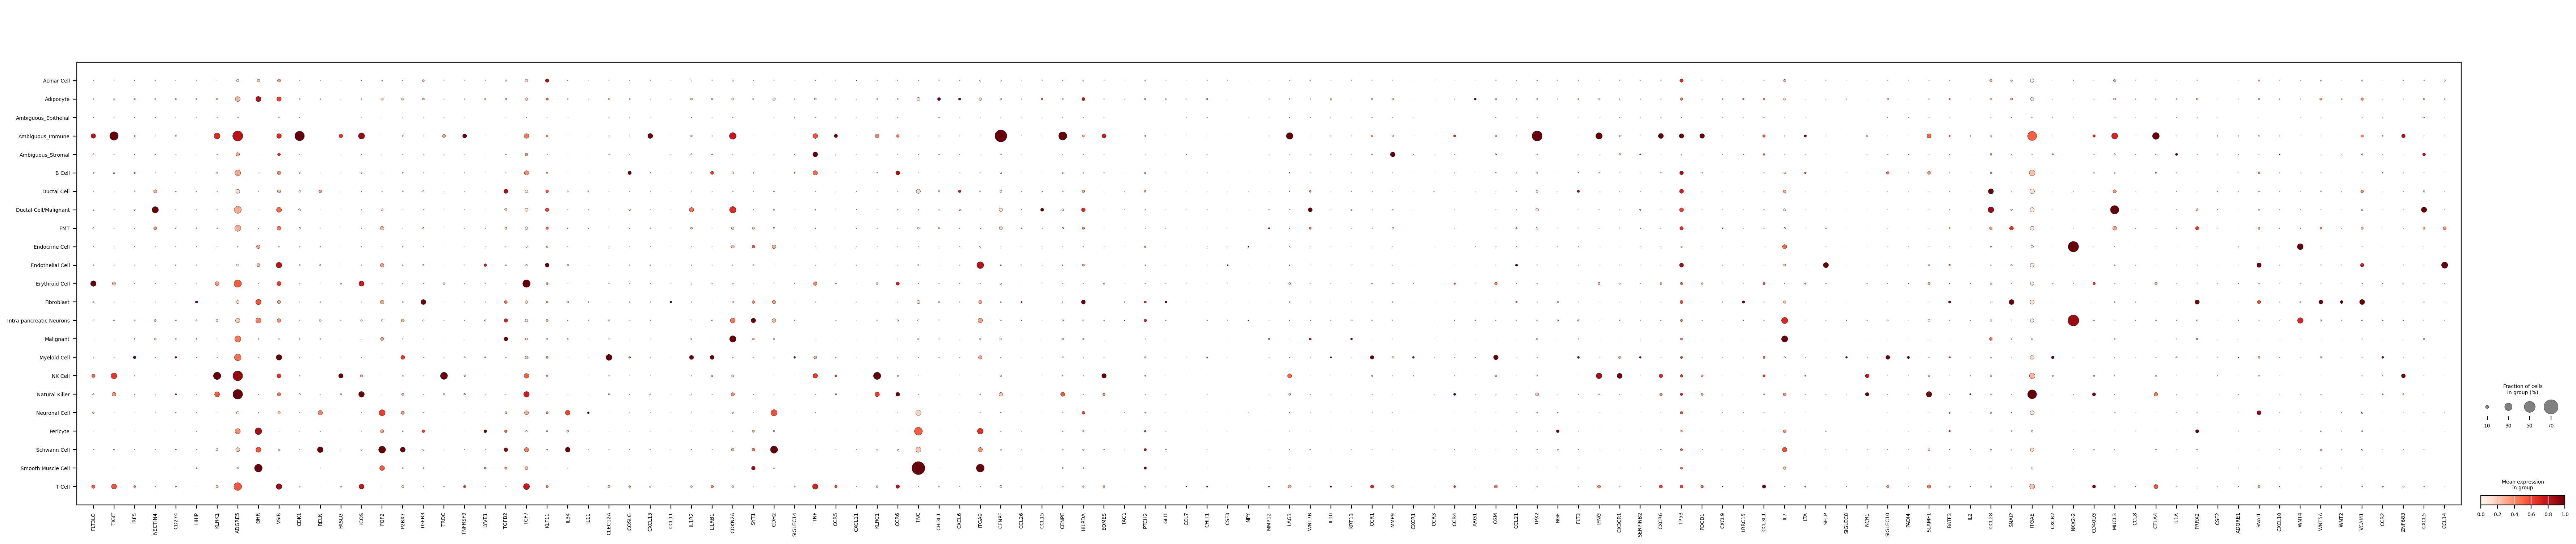

In [611]:
sc.pl.dotplot(adata, groupby='Level_1', var_names=genes_to_plot, layer='log_norm', standard_scale='var')

# Create final list

In [47]:
all_genes = list(set(mofa_genes + broad_markers_list + de_genes + xenium_genes))

In [48]:
len(all_genes)

2520

In [612]:
all_genes = list(set(mofa_genes + broad_markers_list + de_genes + xenium_genes))

In [614]:
all_genes = [i for i in all_genes if i in adata.var_names]